# Project Name: HR Analytics Project


About Project: This HR Analytics Project takes HR data and uses machine learning models to predict which employees will be more likely to leave company by given some attributes. Such model would help an organization predict employee attrition and define a strategy to reduce costly problem. For each employee, in addition to whether the employee left or not i.e. attrition, there are attributes / features such as age, employee role, daily rate, job satisfaction, years at the company, years in current role, etc.

In [145]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts

In [146]:
# Importing Dataset

ds= pd.read_excel("HR_Attrition_Analysis.xlsx")
ds.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [147]:
df= pd.DataFrame(data= ds)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [148]:
df.shape

(1470, 35)

In [149]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [151]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [152]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Observations: Age of the employee is in between 18 and 60. For all columns count is 1470, that means no null values present in dataset. EmployeeCount and StandardHours are single value column. Mean and 50% values are same for almost all columns. Also difference in 75% and max value is less that means chance of presence of outliers are less.

In [153]:
#Checking for Null values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Observations: No null values are present in Dataset.

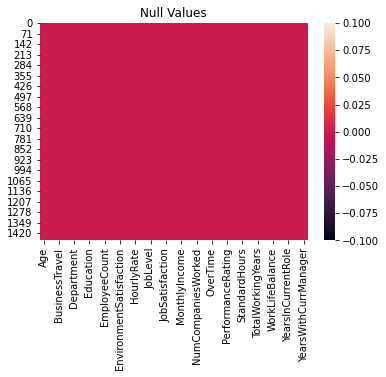

In [154]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

Observations: No null values are present in Dataset.

# EDA

In [155]:
#Getting Unique Values for Object data type columns

for i in df.columns:
    if df[i].dtypes== 'object':
        print(str(i), ' : ', df[i].unique())
        print(df[i].value_counts())
        print()
        print()

Attrition  :  ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64


BusinessTravel  :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


Department  :  ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


EducationField  :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


Gender  :  ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64


JobRole  :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Rese

In [156]:
# Removing columns which having single values

df= df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber' ], axis=1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


No     1233
Yes     237
Name: Attrition, dtype: int64


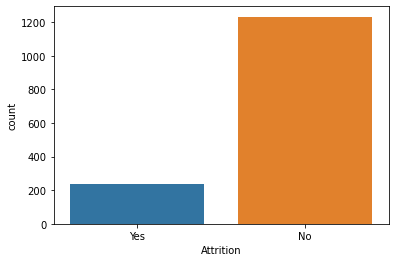

In [157]:
#Univariate Analysis

print(df['Attrition'].value_counts())
sns.countplot(df['Attrition'])

Observations: There are 237 employees left the company and 1233 employees are currently working in company.

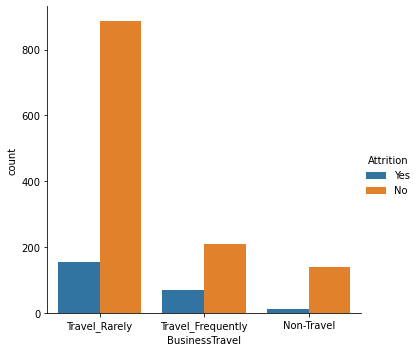

In [158]:
g= sns.catplot(x ="BusinessTravel", hue ="Attrition", kind ="count", data = df)

Observations: We can see that, rate of employees leaving is more in Frequently Travel than Rarely and Non Travler.

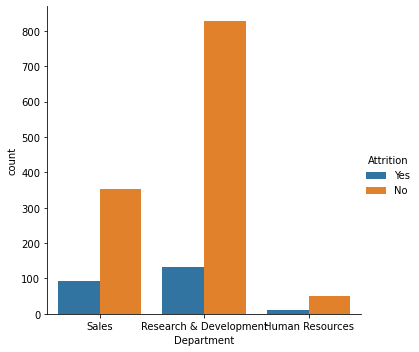

In [159]:
sns.catplot(x= 'Department', hue= 'Attrition', kind= 'count', data= df)

Observations: We can see that, rate of employees leaving is more in sales department than Research & Development and Human Resources.

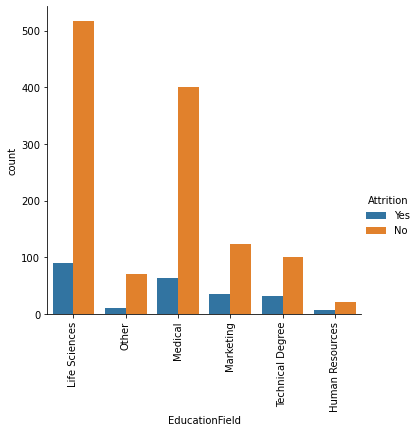

In [160]:
ax= sns.catplot(x= 'EducationField', hue= 'Attrition', kind= 'count', data= df)
plt.xticks(rotation=90)
plt.show()

Observations: We can see that, rate of employees leaving is more in Life Science and Medical.

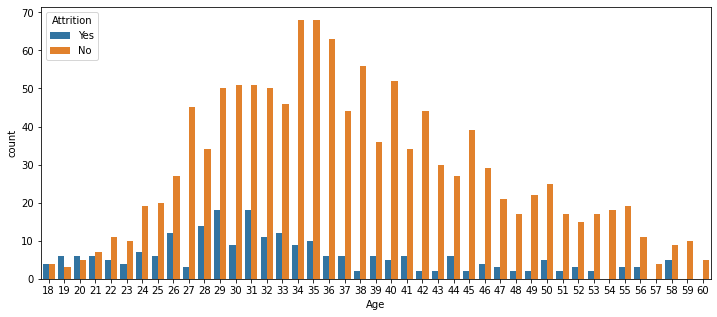

In [161]:
plt.subplots(figsize=(12,5))
sns.countplot('Age', hue= 'Attrition', data= df)

Observations: Maximum Employees at Age of 34 to 35 are currrently working in company where as maximum employees with Age of 29 and 31 are leaving the company.

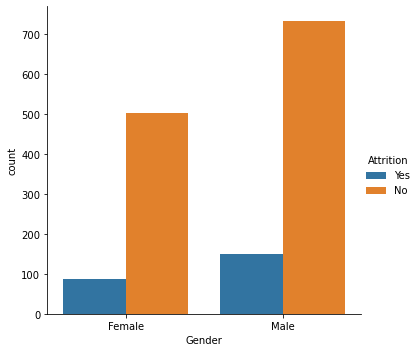

In [162]:
ax= sns.catplot(x= 'Gender', hue= 'Attrition', kind= 'count', data= df)

Observations: There is more Male employees are currently working in company. Also Male employees have left the company.

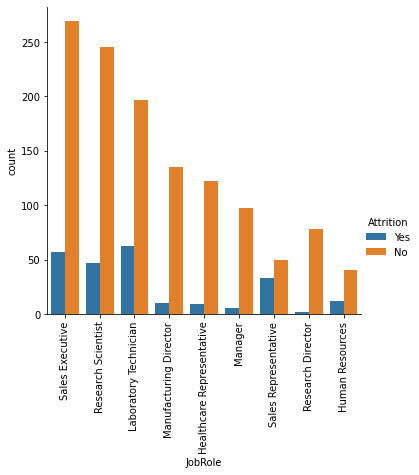

In [163]:
ax= sns.catplot(x= 'JobRole', hue= 'Attrition', kind= 'count', data= df)
plt.xticks(rotation=90)
plt.show()

Observations: Currently employees with job role of Sales Executive and Research scientist are in company.

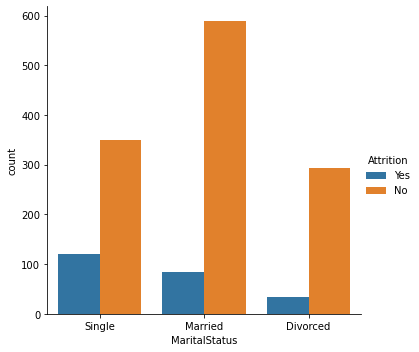

In [164]:
ax= sns.catplot(x= 'MaritalStatus', hue= 'Attrition', kind= 'count', data= df)

Observations: Currently Married employees are more in company. And where as Single employees have left.

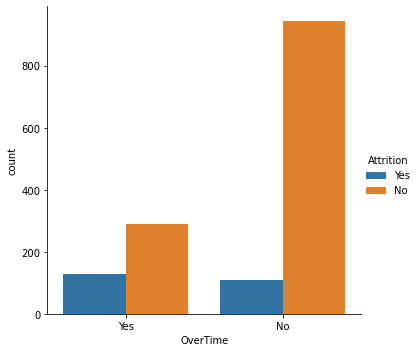

In [165]:
ax= sns.catplot(x= 'OverTime', hue= 'Attrition', kind= 'count', data= df)

Observations: Currently maximum employees are not doing overtime.

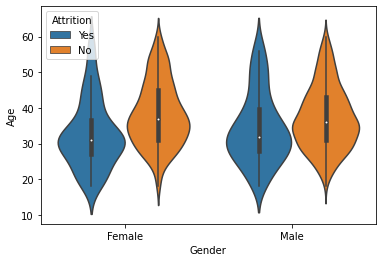

In [166]:
sns.violinplot(x= 'Gender', y= 'Age', hue= 'Attrition', data= df, Split=True)

Observations: Female and male employees with age of 29 to 32 have left the company.

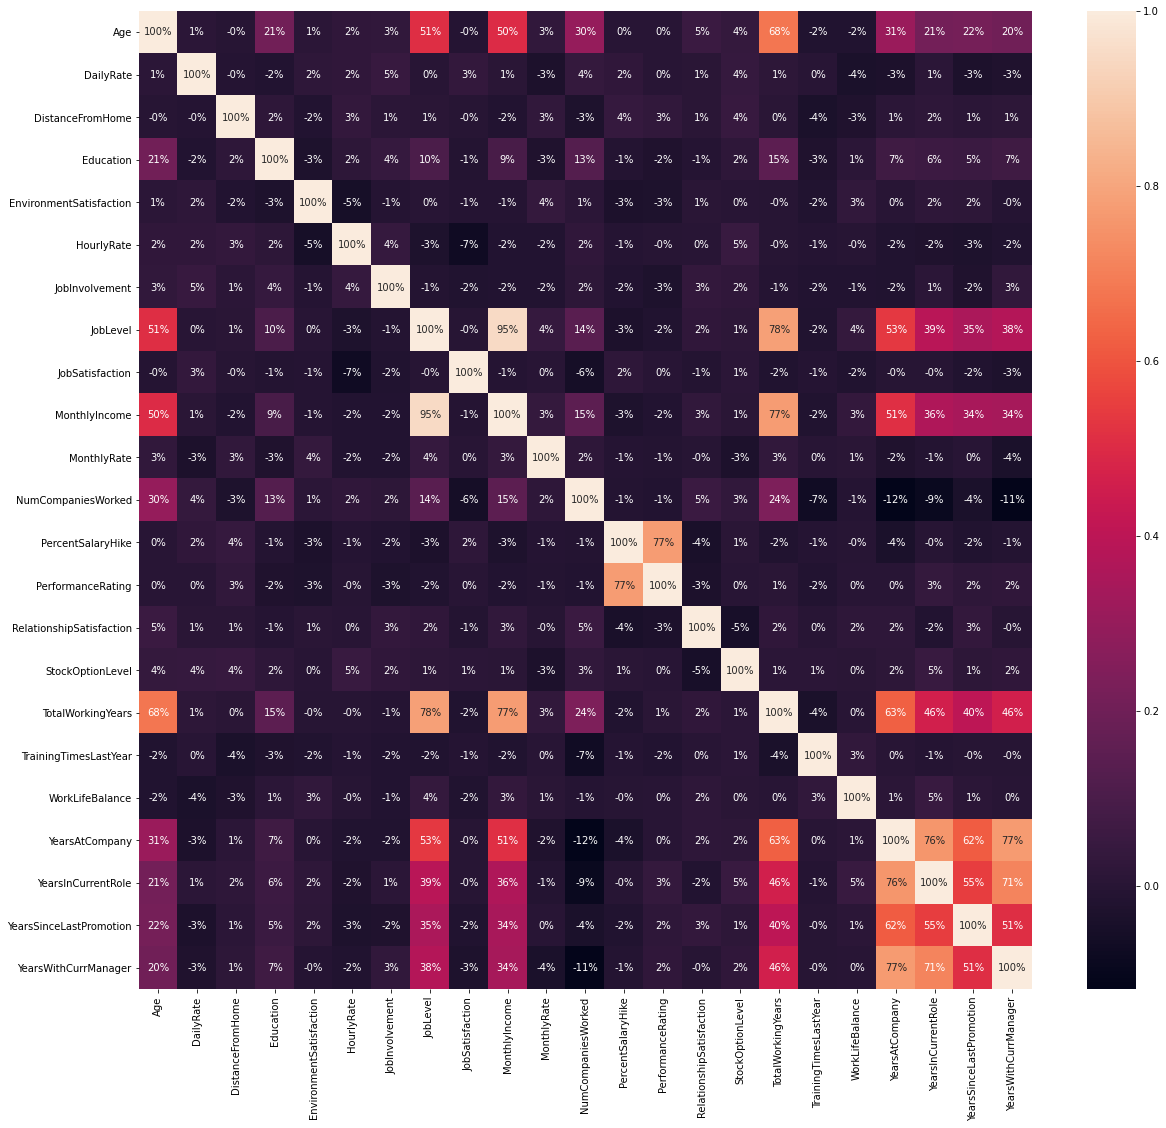

In [167]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot= True, fmt= '.0%')

Observations: Total working years has higher positive correlation with age as longer working will get older employees. Also Total working years has higher correlation with jo level and monthly income. Higher coorelation of monthly income with job level.

In [168]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=le.fit_transform(df[i])
df.head()   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


Age                             AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Attrition                    AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
BusinessTravel               AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
DailyRate                    AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Department                   AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
DistanceFromHome             AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
Education                    AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
EducationField               AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
EnvironmentSatisfaction        AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Gender                      AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
HourlyRate                  AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
JobInvolvement              AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
JobLevel                    AxesSubplot(0.520745,0.518913;0.0824468x0.16413)

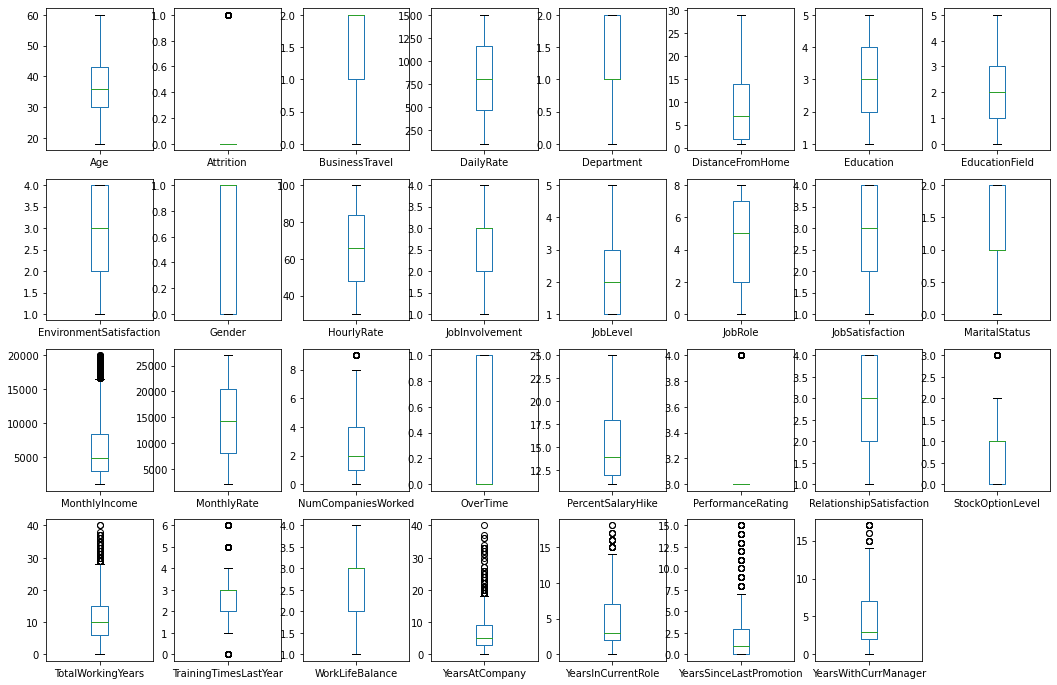

In [169]:
#Checking for the Outliers

df.plot(kind= 'box', subplots= True, layout= (4,8), figsize=(18,12))

Observations: Almost for all columns outliers are no present, except some columns but that one also acceptable.

In [170]:
#Splitting DATA

x= df.drop('Attrition', axis=1)
y= df[['Attrition']]
print(x.shape)
print(y.shape)

(1470, 30)
(1470, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000201D6E806A0>,
      dtype=object)

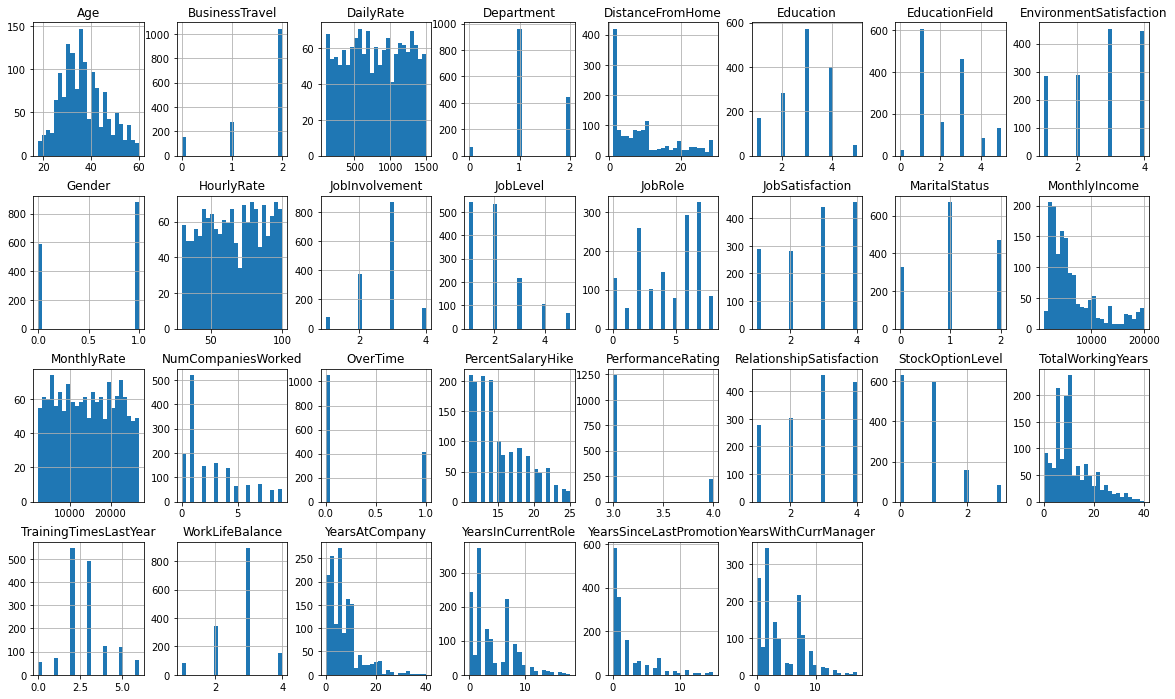

In [171]:
x.hist(figsize=(20,12), layout= (4,8), grid= True, bins=25)

Observations: Age, Daily Rate are looks normally distributed. Where as rest all columns are some what left skewed as data values are not varies in terms of numbers.

In [172]:
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
Y

In [173]:
#making the skew less than or equal to 0.55 for better prediction and plotting Normal distribution
for i in x.columns:
    if x[i].skew()>0.5:
        x[i] = np.log(1+df[i])
x.skew()

Age                         0.413286
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
WorkLifeBalance            -0.552480
YearsAtCompany             -0.207708
Y

In [174]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,0.693147,2,0.693147,2,0,94,...,1.386294,1,0.000000,2.197225,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,1,279,1,2.197225,1,0.693147,3,1,61,...,1.609438,4,0.693147,2.397895,1.386294,3,2.397895,2.079442,0.693147,2.079442
2,37,2,1373,1,1.098612,2,1.609438,4,1,92,...,1.386294,2,0.000000,2.079442,1.386294,3,0.000000,0.000000,0.000000,0.000000
3,33,1,1392,1,1.386294,4,0.693147,4,0,56,...,1.386294,3,0.000000,2.197225,1.386294,3,2.197225,2.079442,1.386294,0.000000
4,27,2,591,1,1.098612,1,1.386294,1,1,40,...,1.386294,4,0.693147,1.945910,1.386294,3,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,3.178054,2,1.386294,3,1,41,...,1.386294,3,0.693147,2.890372,1.386294,3,1.791759,1.098612,0.000000,1.386294
1466,39,2,613,1,1.945910,1,1.386294,4,1,42,...,1.386294,1,0.693147,2.302585,1.791759,3,2.079442,2.079442,0.693147,2.079442
1467,27,2,155,1,1.609438,3,0.693147,2,1,87,...,1.609438,2,0.693147,1.945910,0.000000,3,1.945910,1.098612,0.000000,1.386294
1468,49,1,1023,2,1.098612,3,1.386294,4,1,63,...,1.386294,4,0.000000,2.890372,1.386294,2,2.302585,1.945910,0.000000,2.197225


In [175]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [176]:
#Standardization of Data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaledX= scaler.fit_transform(x)
new_x= pd.DataFrame(data=scaledX, columns= x.columns)
x=new_x
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.505350,-0.891688,-0.958897,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-1.056106,-0.138921,-3.365435,-2.493820,0.177344,0.290611,-0.973342,0.547996
1,1.322365,-0.913194,-1.297775,-0.493817,0.252002,-1.868426,-0.958897,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.471284,0.148411,0.305049,0.338096,0.774724,0.882670,-0.117271,0.904924
2,0.008343,0.590048,1.414363,-0.493817,-1.031607,-0.891688,1.239443,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-1.056106,-0.307569,0.305049,0.338096,-2.394527,-1.736783,-0.973342,-1.675043
3,-0.429664,-0.913194,1.461466,-0.493817,-0.695482,1.061787,-0.958897,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-1.056106,-0.138921,0.305049,0.338096,0.509502,0.882670,0.738799,-1.675043
4,-1.086676,0.590048,-0.524295,-0.493817,-1.031607,-1.868426,0.704083,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.471284,-0.498767,0.305049,0.338096,-0.942513,-0.352871,0.383498,-0.311993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,-0.913194,0.202082,-0.493817,1.397995,-0.891688,0.704083,0.254625,0.816497,-1.224807,...,-0.426230,0.266233,0.471284,0.853567,0.305049,0.338096,-0.026394,-0.352871,-0.973342,0.044935
1466,0.227347,0.590048,-0.469754,-0.493817,-0.041631,-1.868426,0.704083,1.169781,0.816497,-1.175601,...,-0.426230,-1.584178,0.471284,0.011941,1.378597,0.338096,0.353830,0.882670,-0.117271,0.904924
1467,-1.086676,0.590048,-1.605183,-0.493817,-0.434763,0.085049,-0.958897,-0.660531,0.816497,1.038693,...,2.346151,-0.658973,0.471284,-0.498767,-3.365435,0.338096,0.177344,-0.352871,-0.973342,0.044935
1468,1.322365,-0.913194,0.546677,1.401512,-1.031607,0.085049,0.704083,1.169781,0.816497,-0.142264,...,-0.426230,1.191438,-1.056106,0.853567,0.305049,-1.077862,0.648755,0.714462,-0.973342,1.051057


In [177]:
#Machine Learning

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import joblib
import warnings
warnings.filterwarnings('ignore')

In [178]:
#Finding Best Random State
maxACCU=0
maxRS=0
for i in range(1,1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.3, random_state=i)
    lg= LogisticRegression()
    lg.fit(x_train, y_train)
    pred_lg= lg.predict(x_test)
    acc= accuracy_score(y_test, pred_lg)
    if acc>maxACCU:
        maxACCU=acc
        maxRS= i
print(maxACCU)
print(maxRS)

0.9229024943310657
123


In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.3, random_state=123)

In [180]:
x_train.shape

(1029, 30)

In [181]:
x_test.shape

(441, 30)

In [182]:
lg= LogisticRegression()
gnb= GaussianNB()
svc= SVC()
knn= KNeighborsClassifier()
dtc= DecisionTreeClassifier()
rf= RandomForestClassifier()
ad= AdaBoostClassifier()
xgb= XGBClassifier()

models= [lg, gnb, svc, knn, dtc, rf,ad, xgb ]

for m in models:
    m.fit(x_train, y_train)
    predict= m.predict(x_test)
    print(m, 'Acuracy score -')
    print(accuracy_score(y_test, predict))
    print()

LogisticRegression() Acuracy score -
0.9229024943310657

GaussianNB() Acuracy score -
0.8276643990929705

SVC() Acuracy score -
0.8979591836734694

KNeighborsClassifier() Acuracy score -
0.8820861678004536

DecisionTreeClassifier() Acuracy score -
0.8095238095238095

RandomForestClassifier() Acuracy score -
0.8934240362811792

AdaBoostClassifier() Acuracy score -
0.9160997732426304

[12:29:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child

In [183]:
#Cross Validation
from sklearn.model_selection import cross_val_score

for m in models:
    scr_m= cross_val_score(m, x,y, cv=5)
    print('CV score of ',m,  scr_m.mean())
    print()
    print()

CV score of  LogisticRegression() 0.8768707482993197


CV score of  GaussianNB() 0.8156462585034013


CV score of  SVC() 0.8673469387755102


CV score of  KNeighborsClassifier() 0.8517006802721088


CV score of  DecisionTreeClassifier() 0.7884353741496598


CV score of  RandomForestClassifier() 0.8557823129251702


CV score of  AdaBoostClassifier() 0.870748299319728


[12:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:29:24

Observations: From above we can observe that for DecisionTreeClassifier model there is less difference in accuracy_score and cross validation accuracy_score so we will select DecisionTreeClassifier model for final predictions.

In [184]:
#Hyperparameter Tuning for Best selected model   DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

parameters= {'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': list(range(1,11)),
    "max_depth": [3, None],
    'min_samples_leaf': list(range(1,11))}

GSV= GridSearchCV(dtc, parameters, cv=5)
GSV.fit(x_train, y_train)
GSV.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 10,
 'min_samples_leaf': 10,
 'splitter': 'best'}

In [185]:
GCV_pred= GSV.best_estimator_.predict(x_test)
print('accuracy_score - ', accuracy_score(y_test, GCV_pred))
print(confusion_matrix(y_test, GCV_pred))
print(classification_report(y_test, GCV_pred))

accuracy_score -  0.8820861678004536
[[376   8]
 [ 44  13]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       384
           1       0.62      0.23      0.33        57

    accuracy                           0.88       441
   macro avg       0.76      0.60      0.63       441
weighted avg       0.86      0.88      0.86       441



In [187]:
# Plotting AUC-ROC curve for best model-  DecisionTreeClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [189]:
y_pred_prob= GSV.best_estimator_.predict_proba(x_test)[:,1]
y_pred_prob

array([0.63414634, 0.13761468, 0.12162162, 0.12844037, 0.12844037,
       0.12844037, 0.45555556, 0.12844037, 0.12162162, 0.04365079,
       0.12844037, 0.04365079, 0.13761468, 0.34042553, 0.12162162,
       0.13761468, 0.13761468, 0.12844037, 0.04365079, 0.12162162,
       0.12162162, 0.13761468, 0.34042553, 0.04365079, 0.63414634,
       0.04365079, 0.12844037, 0.12162162, 0.04365079, 0.12844037,
       0.04365079, 0.13761468, 0.04365079, 0.45555556, 0.04365079,
       0.12162162, 0.04365079, 0.12844037, 0.32      , 0.45555556,
       0.04365079, 0.12162162, 0.04365079, 0.04365079, 0.63414634,
       0.45555556, 0.04365079, 0.13761468, 0.34042553, 0.04365079,
       0.04365079, 0.12162162, 0.12844037, 0.13761468, 0.04365079,
       0.12162162, 0.04365079, 0.12844037, 0.12844037, 0.12844037,
       0.12162162, 0.12162162, 0.12844037, 0.13761468, 0.13761468,
       0.12844037, 0.12162162, 0.13761468, 0.12844037, 0.34042553,
       0.12162162, 0.34042553, 0.04365079, 0.13761468, 0.63414

In [190]:
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [191]:
fpr

array([0.        , 0.02083333, 0.05208333, 0.10416667, 0.15364583,
       0.3046875 , 0.49479167, 0.73177083, 1.        ])

In [192]:
tpr

array([0.        , 0.22807018, 0.40350877, 0.50877193, 0.59649123,
       0.66666667, 0.73684211, 0.87719298, 1.        ])

In [193]:
thresholds

array([1.63414634, 0.63414634, 0.45555556, 0.34042553, 0.32      ,
       0.13761468, 0.12844037, 0.12162162, 0.04365079])

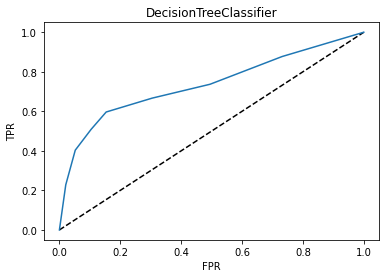

In [196]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label= 'DecisionTreeClassifier')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('DecisionTreeClassifier')
plt.show()

Observations: We can observe that A plot of the ROC Curve confirms the AUC interpretation of a best model for most probability thresholds.

In [201]:
print(roc_auc_score(y_test, GSV.best_estimator_.predict(x_test)))

0.6036184210526315


In [197]:
#Saving the Model
import joblib

joblib.dump(GSV.best_estimator_, 'HR_Attrition_best_dtc_model.obj')

['HR_Attrition_best_dtc_model.obj']

Conclusion: For Analysis of HR_Attrition_Analysis project we have selected DecisionTreeClassifier model which having accuracy 88.21%.